<a href="https://colab.research.google.com/github/snehilsanyal/testrepo/blob/readme-edits/DataPreparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (c) 2020, Project Emotion Space


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!mkdir dataset 
!mkdir dataset/facesdb 
!mkdir dataset/facesdb/metadata dataset/facesdb/other

mkdir: cannot create directory ‘dataset’: File exists
mkdir: cannot create directory ‘dataset/facesdb’: File exists
mkdir: cannot create directory ‘dataset/facesdb/metadata’: File exists


In [4]:
# This is the complete dataset for the dataframe.
# /content/dataset/facesdb/facesdb/
%cd /content/dataset/facesdb/
!unzip -q "/content/drive/My Drive/facesdb.zip"
# These are only images for the train folder
# /content/dataset/facesdb/train/
!unzip -q "/content/drive/My Drive/train.zip"

/content/dataset/facesdb


## Import Packages

In [0]:
import os, sys, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob
import albumentations as A
from sklearn.model_selection import KFold
import torch
import torch.nn as nn
import torch.nn.functional as F

# Current processing device (cpu/gpu)
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# In case we are using this code in different platforms
COLAB = 0; KAGGLE = 1; PC = 2; AWS = 3; GCP = 4;
COMPUTE_PLATFORM = COLAB

# Data I/O

In [34]:
# Path to data and other packages
data_folder = "/content/dataset/facesdb/"
train_folder = "/content/dataset/facesdb/train/"
metadata_folder = "/content/dataset/facesdb/metadata/"
checkpoints_folder = "/content/dataset/facesdb/others/"
packages_folder = "/content/dataset/facesdb/packages/"
number_of_images = len(glob.glob(data_folder + "facesdb/*/bmp/*"))
folder_names = [[]]*number_of_images
labels = [[]]*number_of_images
file_names = [[]]*number_of_images

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# Metadata FacesDB


/content/dataset/facesdb/facesdb/s005/bmp/s005-13_img.bmp
/content/dataset/facesdb/facesdb/s005/bmp/s005-09_img.bmp
/content/dataset/facesdb/facesdb/s005/bmp/s005-03_img.bmp
/content/dataset/facesdb/facesdb/s005/bmp/s005-08_img.bmp
/content/dataset/facesdb/facesdb/s005/bmp/s005-12_img.bmp
/content/dataset/facesdb/facesdb/s005/bmp/s005-00_img.bmp
/content/dataset/facesdb/facesdb/s005/bmp/s005-11_img.bmp
/content/dataset/facesdb/facesdb/s005/bmp/s005-10_img.bmp
/content/dataset/facesdb/facesdb/s005/bmp/s005-05_img.bmp
/content/dataset/facesdb/facesdb/s005/bmp/s005-04_img.bmp
/content/dataset/facesdb/facesdb/s005/bmp/s005-01_img.bmp
/content/dataset/facesdb/facesdb/s005/bmp/s005-02_img.bmp
/content/dataset/facesdb/facesdb/s005/bmp/s005-06_img.bmp
/content/dataset/facesdb/facesdb/s005/bmp/s005-07_img.bmp
/content/dataset/facesdb/facesdb/s037/bmp/s037-03_img.bmp
/content/dataset/facesdb/facesdb/s037/bmp/s037-11_img.bmp
/content/dataset/facesdb/facesdb/s037/bmp/s037-01_img.bmp
/content/datas

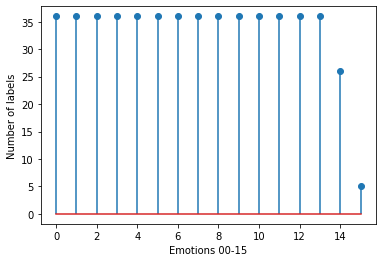

Number of classes:  [36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 26, 5]
Classes:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [40]:
## Emotion labels 00-15
number_of_labels = [0]*16
i = 0
for f in glob.glob(data_folder + "facesdb/*/bmp/*"):
 print(f)
 file_names[i] = f.rsplit('\\',1)[-1]
 folder_names[i] = (f[33]+f[34]+f[35]+f[36])
 labels[i] = int(f[47]+f[48])
 for j in range(16):
  if labels[i] == j:
   number_of_labels[labels[i]]+=1
	#print(file_names[i],labels[i],folder_names[i])
 i = i + 1
dic = {'Image_name': file_names, 'Label': labels, 'Folder': folder_names}
df = pd.DataFrame(data = dic)
print(df)
df.to_csv(r"/content/dataset/facesdb/metadata/facesdb.csv", header = False, index = False)

## Class distribution
# 15 classes 00-15
classes = np.arange(0, 16, 1)
plt.stem(classes, number_of_labels, use_line_collection= True)
plt.xlabel("Emotions 00-15")
plt.ylabel("Number of labels")
plt.show()
print("Number of classes: ",number_of_labels)
print("Classes: ",classes)
## From github the csv file can be directly stored
# url = "https://raw.githubusercontent.com/zenify88/ProjectEmotionSpace/dev/software/facesdb.csv?token=AJ46ZSN5VICYOKPJIA3W6326KYJXC"
# df1 = pd.read_csv(url)

# Load Data

In [0]:
# Read metadata
df_meta = []
df_meta.append(pd.read_csv(metadata_folder + "facesdb.csv")) # Dataset 1
#df_meta.append(pd.read_csv(metadata_folder + "")) # Dataset 2 (optional)
#df_meta.append(pd.read_csv(metadata_folder + "")) # Dataset 3 (optional)
#df_meta.append(pd.read_csv(metadata_folder + "")) # Dataset 4 (optional)

# Perform modifications such that it becomes useful in our analysis
def metadata_processing(dataframe_array):
    """ METADATA PROCESSING """
    # combine metadata
    # fill NaN or missing data
    # Add/drop features
    return dataframes
#df_meta_processed = metadata_processing(df_meta)

# Visualize data
def metadata_visualization(dataframe):
    """ VISUALIZE METADATA """
    pass
print(df_meta)